In [135]:
import numpy as np
from matplotlib import  cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
%matplotlib inline

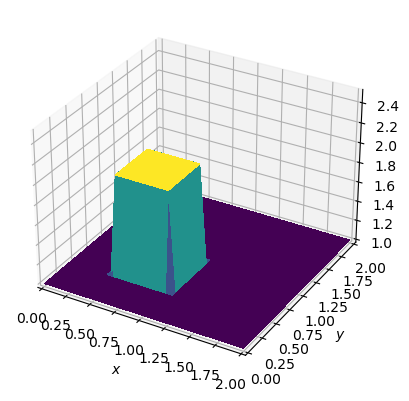

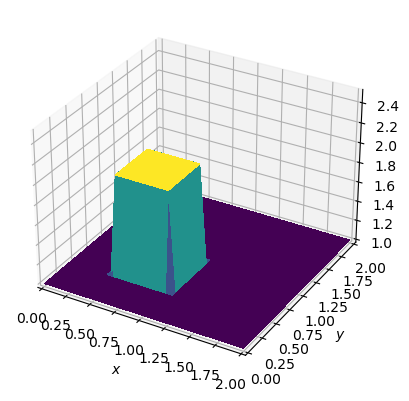

In [136]:
###variable declarations
nx = 31
ny = 31
nt = 17
nu = .05
nv = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
un = np.ones((ny, nx))

v = np.ones((nx,ny))
vn = np.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)


ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, v, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)


ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')    

def discrete_laplacian(M):
    """Get the discrete Laplacian of matrix M"""
    L = -4*M
    L += np.roll(M, (0,-1), (0,1)) # right neighbor
    L += np.roll(M, (0,+1), (0,1)) # left neighbor
    L += np.roll(M, (-1,0), (0,1)) # top neighbor
    L += np.roll(M, (+1,0), (0,1)) # bottom neighbor
    
    return L

In [191]:

def discrete_laplacian(M):
    """Get the discrete Laplacian of matrix M"""
    L = -4*M
    L += np.roll(M, (0,-1), (0,1)) # right neighbor
    L += np.roll(M, (0,+1), (0,1)) # left neighbor
    L += np.roll(M, (-1,0), (0,1)) # top neighbor
    L += np.roll(M, (+1,0), (0,1)) # bottom neighbor
    
    return L



def diffuse(nt,  Du=0.0001, Dv=0.0006, a = 1.0, b = -1, c = 2, d = -1.5, h = 1, k = 1):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 


    
    for n in range(nt + 1): 
        un = u.copy()
        vn = v.copy()
        laplace_u =  1/dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 1/dy**2 *(un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])
        laplace_v = 1/dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) + 1/dy**2 *(vn[2:,1: -1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])
        
        u[1:-1, 1:-1] = un[1:-1,1:-1] + (a*(un[1:-1,1:-1]-h)+b*(vn[1:-1,1:-1]-k)+Du*laplace_u)*dt
        v[1:-1, 1:-1] = vn[1:-1,1:-1] + (c*(un[1:-1,1:-1]-h)+d*(vn[1:-1,1:-1]-k)+Dv*laplace_v)*dt


        u[0, :] = u[-2, :]
        u[-1, :] = u[1, :]
        u[:, 0] = u[:, -2]
        u[:, -1] = u[:, 1]

        v[0, :] = v[-2, :]
        v[-1, :] = v[1, :]
        v[:, 0] = v[:, -2]
        v[:, -1] = v[:, 1]

    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(X, Y, v[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    

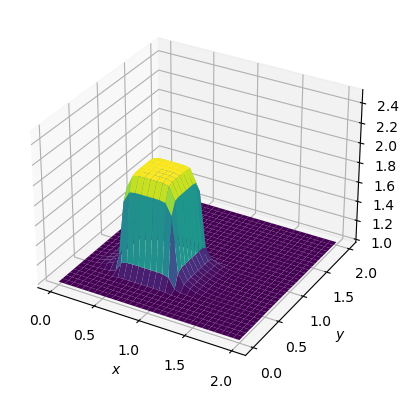

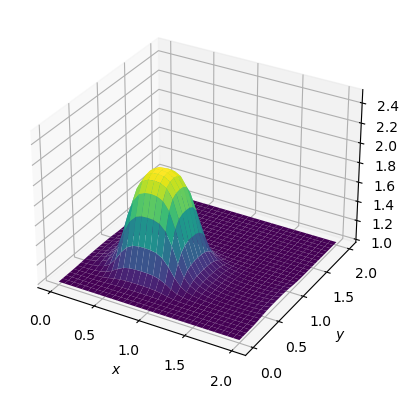

In [192]:
diffuse(400,a=0,b=0,c=0,d=0,h=0,k=0)

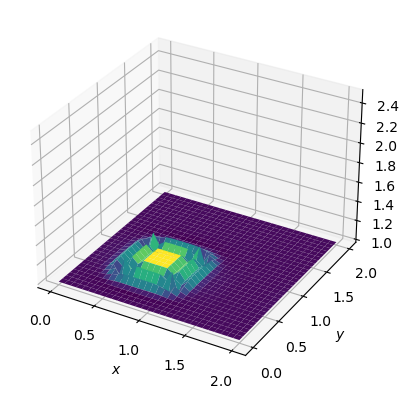

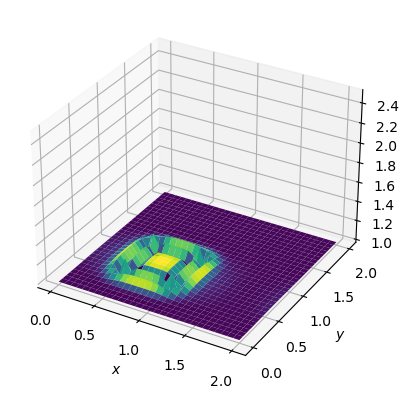

In [193]:
diffuse(400,)